# Ford GoBike System Data Exploration
## by Victoria Perez Mola

## Introduction 

The dataset chosen to perform an analysis is the [Bay wheels (ex Ford GoBike) System Data](https://www.lyft.com/bikes/bay-wheels/system-data). 
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## The Data

Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

## Preliminary Wrangling

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import listdir
import datetime

%matplotlib inline

Read all files from the Data folder and join them into one single dataset.

In [27]:
files_list = []
data_dir = 'Data'

# Define the columns I need from the files
columns = ['duration_sec','start_time','end_time','start_station_id','start_station_name',
           'start_station_latitude','start_station_longitude','end_station_id','end_station_name',
           'end_station_latitude','end_station_longitude','bike_id','user_type']

# read and append each file in the folder
for file in listdir(data_dir):
    files_list.append(pd.read_csv(data_dir+'/'+file,  usecols = lambda column : column in columns))
    
# assign the files data to a data frame    
df = pd.concat(files_list)

In [28]:
# Check dataframe
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
8172,396,2019-10-30 22:45:41.2720,2019-10-30 22:52:17.3490,247.00,Fulton St at Bancroft Way,37.87,-122.27,268.00,Ellsworth St at Russell St,37.86,-122.26,11724,Customer
422875,10153,2020-02-15 12:27:43,2020-02-15 15:16:57,nan,NaN,37.80,-122.43,nan,NaN,37.80,-122.43,469219,Customer
237657,431,2019-07-17 08:20:46,2019-07-17 08:27:58,nan,NaN,37.80,-122.25,nan,NaN,37.80,-122.26,238875,Subscriber


In [29]:
# check min and max date
(str(df.start_time.min())+' - '+str(df.start_time.max()))

'2019-03-01 00:00:20.6750 - 2020-03-01 23:56:31'

In [30]:
# Check the amount of data
df.shape

(2859697, 13)

In [31]:
#get information about the joint dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859697 entries, 0 to 432353
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 305.4+ MB


In [32]:
# check unique values
df.nunique()

duration_sec                 15426
start_time                 2810872
end_time                   2810564
start_station_id               446
start_station_name             460
start_station_latitude      296493
start_station_longitude     312608
end_station_id                 446
end_station_name               460
end_station_latitude        299332
end_station_longitude       316227
bike_id                      13218
user_type                        2
dtype: int64

In [33]:
#check missing data
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           500488
start_station_name         499307
start_station_latitude          0
start_station_longitude         0
end_station_id             502537
end_station_name           501408
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
dtype: int64

- More stations are missing the start_station_id than the end_station_id
- More stations are missing the start_station_id than the start_station_name         
- More stations are missing the end_station_id than the end_station_name

In [34]:
# check duplicated
df.duplicated().sum()

0

### Data issues
After performing some data exploration, I've found the following quality issues:

- fields start_time and end_time should be datetime
- start_station_id and end_station_id are float, should be categorical variables
- user_type should be category: Suscriber, Customer
- Start_station_id and end_station_id and names are missing for a great part of the records, but their latitudes aren't


In [35]:
# correct datatypes
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.user_type = df.user_type.astype('category')

# covert to str and remove the decimals from float 
df.start_station_id = df.start_station_id.astype(str).str[:-2]
df.end_station_id = df.end_station_id.astype(str).str[:-2]

# convert to category 
df.start_station_id = df.start_station_id.astype('category')
df.end_station_id = df.end_station_id.astype('category')

In [36]:
# check the descriptive statistics of the dataset 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id
count,2859697.00,2859697.00,2859697.00,2859697.00,2859697.00,2859697.00
mean,813.08,37.76,-122.35,37.76,-122.35,112635.44
std,1934.53,0.17,0.46,0.26,0.77,232354.15
min,60.00,0.00,-122.51,0.00,-122.58,4.00
25%,366.00,37.77,-122.42,37.77,-122.41,2306.00
50%,583.00,37.78,-122.40,37.78,-122.40,6414.00
75%,907.00,37.79,-122.39,37.80,-122.39,12544.00
max,912110.00,45.51,0.00,45.51,0.00,999960.00


The duration in seconds, could be set to minutes. 
The max value sems to be wrong 912110 seconds would mean a bike rental of 10 days and it doesn't make sense with the rest of the descriptive statistics of the set. 

In [37]:
# check the modified dataset
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
295099,439,2020-01-24 09:25:43.000,2020-01-24 09:33:03.000,n,NaN,37.81,-122.41,17,Embarcadero BART Station (Beale St at Market St),37.79,-122.40,183838,Subscriber
89432,336,2020-02-08 02:04:10.985,2020-02-08 02:09:47.942,38,The Embarcadero at Pier 38,37.78,-122.39,81,Berry St at 4th St,37.78,-122.39,3381,Customer
122119,208,2019-11-09 16:45:41.428,2019-11-09 16:49:09.439,126,Esprit Park,37.76,-122.39,93,4th St at Mission Bay Blvd S,37.77,-122.39,12954,Subscriber


### What is the structure of your dataset?
The dataset contains almost 3M ride records, 13218 different bikes and 446 defined stations. 
Is conformed by one single table where each row represents a single trip and its features of different natures.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding trends in the data related to when the rides take place. 
Some of the questions I'm looking to answer: 

* Is there any peak on the rides any particular time of the day?
* Does this has any relation with the user type?
* Does this varies weekdays vs weekends? 
* Does the season of the year affects the frequency of the rides? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features of interest are the station ids, the user type and the start and end time of the rides. 
To answer the questions I've postulated the start time and end time are with no doubt the most important ones, and the features that more analysis and transformation will need. With this information I could extract the lenght, time of the day, the day of the week, and the season the trips are taking place. 

I will also need the user type and the stations ids to add information on the previous variables and to find correlations between the data.

## Univariate Exploration

I will explore the distribution of the rides accorss different time measures: hour of the day, day of the week and month of the year. 
I want to have a first look to find the trends. 

#### Number of Rides Across Different Hours of the Day, days of the week and month of the year

To make it easier to analyze I'll transform the start_time field into three new fields adapted to the needs of my analysis: hour, day and month. 
Since the bike sharing is intended to be for short periods of time, I'll take in consideration only the start time of the ride for this purpose. 

In [52]:
# I'll add an hours, weekday and month column to to facilitate the analysis
df['start_hour'] = df.start_time.dt.hour
df['start_month'] = df.start_time.dt.month

# get the day of the week as an integer, where Monday is 0 and Sunday is 6
df['start_day'] = df.start_time.dt.weekday

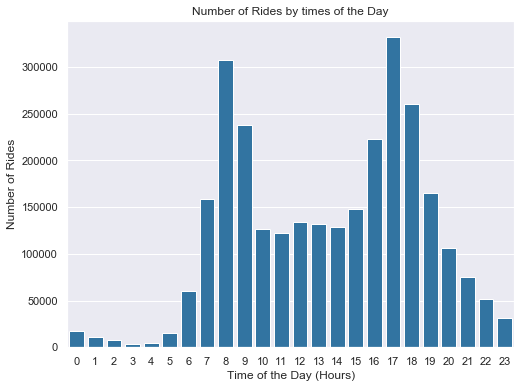

In [18]:
#plot the number of rides per hour of the day
base_color = sb.color_palette()[0]
sb.set(rc={'figure.figsize':(8,6)})

sb.countplot(data = df, x = 'start_hour', color = base_color);

plt.xlabel("Time of the Day (Hours)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by times of the Day");

It's clear that there are two peaks in the time of the day there are more rides: around 8 and around 17. 

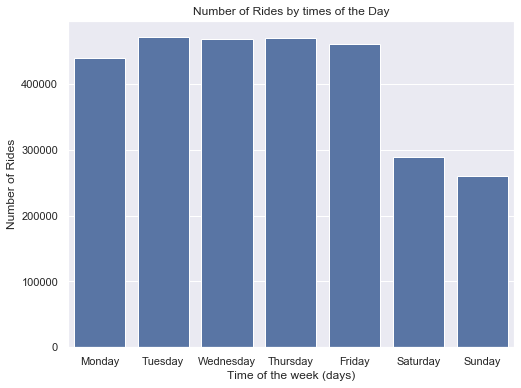

In [19]:
#plot the number of rides per weekday
base_color = sb.color_palette()[0]

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.set(rc={'figure.figsize':(8,6)})

ax = sb.countplot(data = df, x = 'start_day',
             color = base_color);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Time of the week (days)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by times of the Day");

Although there's a lower frequency on Mondays than the other days, it's clear that the demand is much higher from monday to Friday than during the weekends. 
It would be interesting to see if this has any impact on the peka hours seen in the graph above.

In [96]:
#create two dataframes to separete weekdays from weekends
weekday = [0,1,2,3,4,5]
weekend = [6,7]

df_weekday = df[df['start_day'].isin(weekday)]
df_weekend = df[df['start_day'].isin(weekend)]

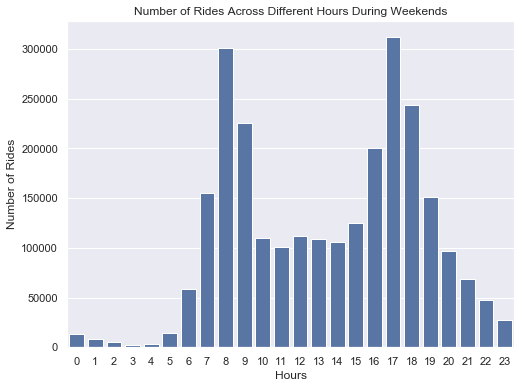

In [79]:
#plot the number of rides during different hours in the week days 
base_color = sb.color_palette()[0]
sb.countplot(data = df_weekday, x = 'start_hour', color = base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Hours During Weekends");

The peak hours are around 8 and 17, as seen in the whole data. 

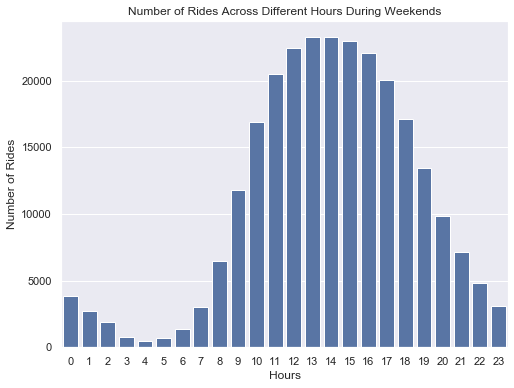

In [78]:
#plot the number of rides during different hours in the weekend 
base_color = sb.color_palette()[0]
sb.countplot(data = df_weekend, x = 'start_hour', color = base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Hours During Weekends");

The peak hours change during the weekends, and instead of having two well defined peaks along the day it has a more established distribution along the day, and one peak only around 13 and 14 hours. 

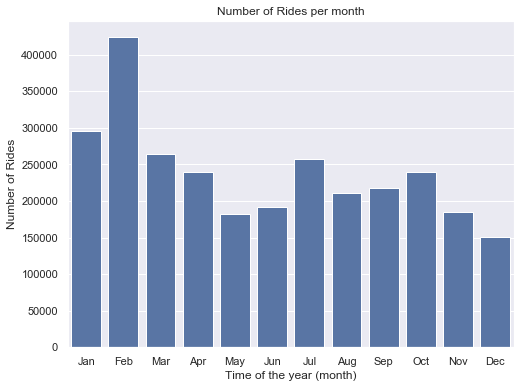

In [21]:
#plot the number of rides per month
base_color = sb.color_palette()[0]

# replace the 0-12 numbers for the name of the months
labels = ['Jan', 'Feb','Mar','Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

sb.set(rc={'figure.figsize':(8,6)})

ax = sb.countplot(data = df, x = 'start_month', color = base_color);

ax.set(xticks=range(12), xticklabels=labels)

plt.xlabel("Time of the year (month)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per month");

It looks like there has been a peak during the months of January and February, the rest of the months we can see that the amount of rides goes up and down, but to a lesser extent. 
It's important to have in mind that the dataset goes from March 2019 to february 2019, so the increase in January and February could also be a general growth of the service and not exactly because of the month. 


#### Types of users
I want to see what share of trips are done by subscribers

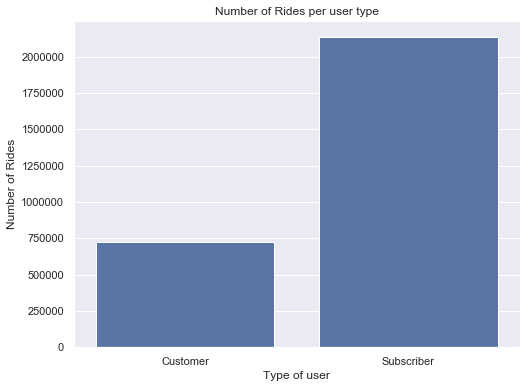

In [47]:
# plot the number of rides by user type
base_color = sb.color_palette()[0]

sb.set(rc={'figure.figsize':(8,6)})

sb.countplot(data = df, x = 'user_type', color = base_color);


plt.xlabel("Type of user")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per user type");

The majority of the trips are done by suscribers rather than casual customers. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After performing tthe data exploration, I realized that the rides are more frequent during working days than during the weekend, and during peak times (around 8 and 17 hs). 
Additionally, it can be seen that although in general the peak hours are those, when seen with more focus on the weekends, the peak days differ and the distribution is along the day and one peak only around 13 and 14 hours.
Regarding the months, there was a peak on the frequency during the most recent months of the dataset, especially during february, but it's not possible to say that is related to the month itself or simply to a general increase of the demand. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I haven't find any unusual distributions in the data. I had to perfrom some changes in the data format to be able to answers the questions that I had proposed. 


## Bivariate Exploration
I want to combine the variables explored before to see if the trends are somehow related. 

#### Duration of the ride vs Day of the week 

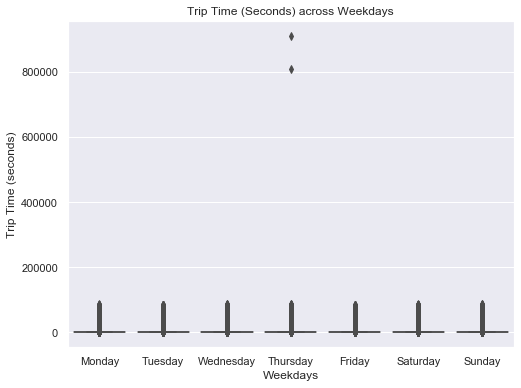

In [56]:
#plot trip time across different days of the week
base_color = sb.color_palette()[0]

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Weekdays")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) across Weekdays");

Because of the outeliers, that we saw in the descriptive statistics of the dataset, is hard to see the data. 
I'll add a log scale

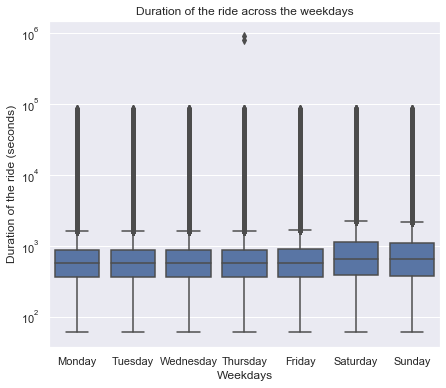

In [57]:
#plot trip time across different days of the week
base_color = sb.color_palette()[0]

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")

ax = sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Weekdays")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Duration of the ride across the weekdays");

It seems to be that the day of the week has an impact on the duration of the ride. Form Monday to Friday the average duration of the ride behaves in a very similar wat, but during Saturday and Sunday the duration of the ride has a slightly higher median and greater standard deviation. 

#### Duration of rides vs user type


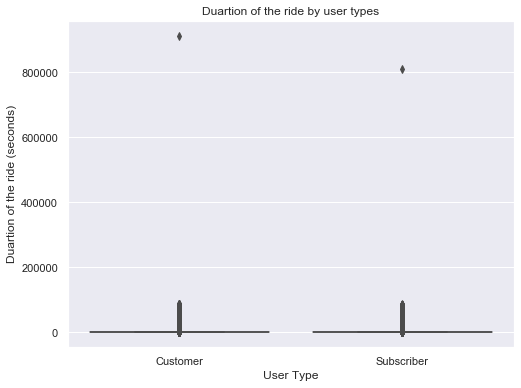

In [58]:
#plot duration vs user_type
base_color = sb.color_palette()[0]

sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color);

plt.xlabel("User Type")
plt.ylabel("Duartion of the ride (seconds)")
plt.title("Duartion of the ride by user types");

Again nothing can be seen because of the two outeliers, I'll apply a log scale

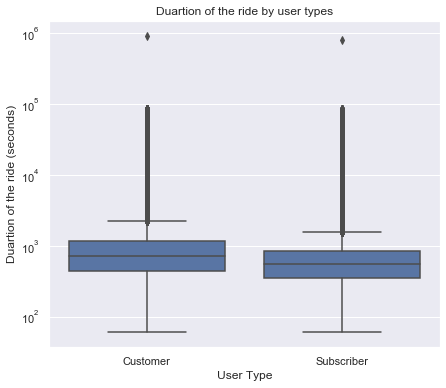

In [60]:
#plot duration vs user_type with a log scale
base_color = sb.color_palette()[0]

f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")

sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color);
plt.xlabel("User Type")
plt.ylabel("Duartion of the ride (seconds)")
plt.title("Duartion of the ride by user types");

Although, the majority of the trips are done by suscribers it can be seen that the the duration of rides of casual customerss are higher. 


#### Amount of rides per time of the day by user type
We've seen that the peak hours change between weekdays and weekends, and the average ride is longer for customer than for suscribers, I want to see if these changes are also seen in the time that the ride is started. 

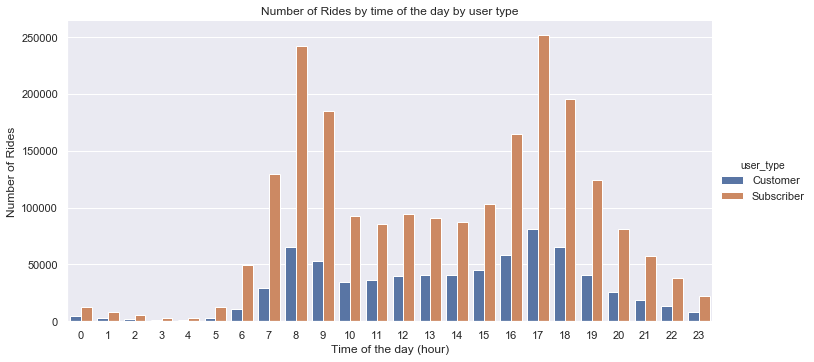

In [106]:
#plot the number of rides per time of the dayper user_type
base_color = sb.color_palette()[0]

sb.catplot(x='start_hour', hue='user_type', kind='count', data=df,height=5, aspect=2);

plt.xlabel("Time of the day (hour)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by time of the day by user type");

We can still see the peaks around 8 and 17 for both user types, but the peak is higher for suscibers than casual customers

#### Amount of rides per day of the week by user type
I'll plot the distribution of the rides along the week divided by user type.

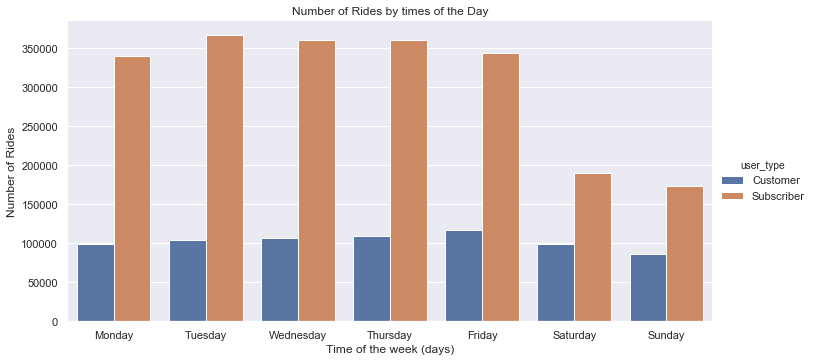

In [105]:
#plot the number of rides per day of week per user_type
base_color = sb.color_palette()[0]

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.catplot(x='start_day', hue='user_type', kind='count', data=df,height=5, aspect=2);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Day of the week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by day of the week by user type");

For both user types the behaviour is similar and the same as observed so far, during the weekends the amount of rides is lower than during the rest of the week. 
Although for casual customers, the difference is less noticeable than the one observed for suscribers, where the amount of rides decreases almost a half. 

### Talk about some of the relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During this part of the exploration phase we could see in more detail how the user type affects the variables seen in the previous section. 
It was clear that suscribers use the bikes more during the weekdays than weekends, and although this tendency can be seen in casual customers as well, the decrease in the demand is lower. Something similar could be seen with the hours of use, but overall the same behaviour was observed along both user types. 


### Did I observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was clear from the last graph that the proportion of rides done by casual customers increased drastically over the weekend compared to the ones from customer. Combined with all the previos observations like peak hours and avera

## Multivariate Exploration

Here I want to find answers to the following questions:
* Where are the stations located and how many bikes are rented there per year?<br>

In [51]:
df_18.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,hour,weekday,month
0,2765,No,75284,285,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.824,1986.0,Male,120,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.239,Subscriber,22,Wednesday,1
1,2815,No,85422,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.310,NaN,NaN,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.351,Customer,16,Wednesday,1
2,3039,No,71576,296,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.116,1996.0,Male,304,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.889,Customer,14,Wednesday,1
3,321,No,61076,47,37.780955,-122.399749,4th St at Harrison St,2018-02-01 07:51:20.500,NaN,NaN,75,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.562,Customer,14,Wednesday,1
4,617,No,39966,19,37.788975,-122.403452,Post St at Kearny St,2018-02-01 06:58:31.053,1991.0,Male,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.667,Subscriber,19,Wednesday,1


In [52]:
#get start station id's and their counts
station_count = df_18['start_station_id'].value_counts().reset_index()
station_count.head()

,index,start_station_id
0,15,38461
1,67,37617
2,30,35092
3,58,34918
4,81,33716


In [53]:
station_count.shape

(332, 2)

In [54]:
#rename columns
station_count.rename(columns={'index':'start_station_id', 'start_station_id':'ride_counts'}, inplace=True)

In [55]:
station_count.head()

,start_station_id,ride_counts
0,15,38461
1,67,37617
2,30,35092
3,58,34918
4,81,33716


In [56]:
#how many rides at stations with no specification 'n'?
station_count[station_count.start_station_id == 'n']

,start_station_id,ride_counts
34,n,11771


In [57]:
#drop row, where station id is 'n'
station_count_clean = station_count[station_count.start_station_id != 'n']

In [58]:
#check if row with start_station_id = 'n' is dropped
station_count_clean[station_count_clean.start_station_id == 'n']

,start_station_id,ride_counts


In [59]:
station_count_clean.shape

(331, 2)

In [60]:
#list start station id's and their longitudes/ latitudes
station_long_lat = df_18[['start_station_id', 'start_station_longitude', 'start_station_latitude']]

In [61]:
station_long_lat.head()

,start_station_id,start_station_longitude,start_station_latitude
0,120,-122.426435,37.761420
1,15,-122.394203,37.795392
2,304,-121.894798,37.348759
3,75,-122.421239,37.773793
4,74,-122.426244,37.776435


In [62]:
station_long_lat.shape

(1863721, 3)

In [63]:
#drop row, where station id is 'n'
station_long_lat_clean = station_long_lat[station_long_lat.start_station_id != 'n']

In [64]:
#check if row with start_station_id = 'n' is dropped
station_long_lat_clean[station_long_lat_clean.start_station_id == 'n']

,start_station_id,start_station_longitude,start_station_latitude


In [65]:
#drop duplicates
station_long_lat_clean_unique = station_long_lat_clean.drop_duplicates()

In [66]:
station_long_lat_clean_unique.shape

(351, 3)

In [67]:
#small differences in longitude and latitude
station_long_lat_clean_unique[station_long_lat_clean_unique.start_station_id == '212']

,start_station_id,start_station_longitude,start_station_latitude
1942,212,-122.260479,37.824931
1297,212,-122.261649,37.825008
512,212,-122.260437,37.824893


In [68]:
station = station_count_clean.merge(station_long_lat_clean_unique, on='start_station_id', how='inner')
station.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,15,38461,-122.394203,37.795392
1,67,37617,-122.395526,37.776639
2,30,35092,-122.395282,37.776598
3,58,34918,-122.417385,37.776619
4,81,33716,-122.393170,37.775880


In [69]:
station.shape

(351, 4)

In [70]:
#check if all duplicates are dropped
station['start_station_id'].value_counts().head(15)

212    3
208    3
192    3
244    3
224    2
245    2
221    2
233    2
234    2
130    2
205    2
280    2
302    2
250    2
101    2
Name: start_station_id, dtype: int64

In [71]:
#small differences in longitude and latitude
station[station.start_station_id == '192']

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
288,192,938,-122.271796,37.826696
289,192,938,-122.269399,37.825794
290,192,938,-122.271797,37.826696


In [72]:
#drop remaining duplicates
station_1 = station.drop_duplicates(subset=['start_station_id'], keep='first')

In [73]:
station_1.shape

(331, 4)

In [74]:
station_1.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,15,38461,-122.394203,37.795392
1,67,37617,-122.395526,37.776639
2,30,35092,-122.395282,37.776598
3,58,34918,-122.417385,37.776619
4,81,33716,-122.393170,37.775880


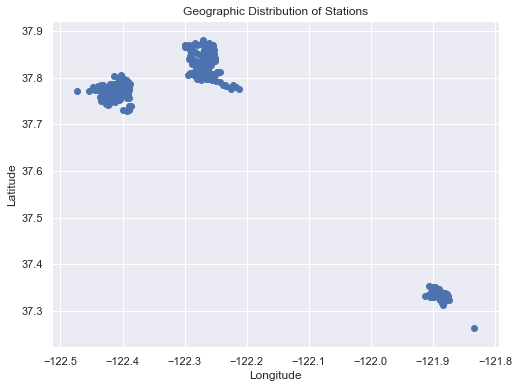

In [76]:
#plot geographic distribution of stations
plt.scatter(data = station_1, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Stations");

The spatial distribution of the points in the above scatter plot shows, that the stations are located in three different cities of the San Francisco Bay Area: The accumulation on the left side is San Francisco, the accumulation in the center in Oakland and the points in the lower right corner represent San Jose.<br>
In order to improve the readability of the scatter plot, I separate the data frame 'station_1' into three sub data frames by its longitude and latitude By doing that, each sub data frame would represent the stations, what are located in one of the three above mentioned cities.

In [77]:
station_1.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,15,38461,-122.394203,37.795392
1,67,37617,-122.395526,37.776639
2,30,35092,-122.395282,37.776598
3,58,34918,-122.417385,37.776619
4,81,33716,-122.393170,37.775880


In [78]:
#only keep rows, where station longitude is smaller than -122,35
#Get the stations of San Francisco
station_SF = station_1[station_1.start_station_longitude < -122.35]

In [79]:
station_SF.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,15,38461,-122.394203,37.795392
1,67,37617,-122.395526,37.776639
2,30,35092,-122.395282,37.776598
3,58,34918,-122.417385,37.776619
4,81,33716,-122.393170,37.775880


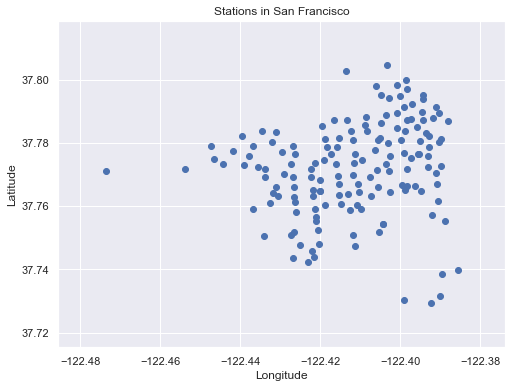

In [80]:
#show spatial distribution of stations in San Francisco
plt.scatter(data = station_SF, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Francisco");

In [81]:
#only keep rows, where station longitude is bigger than -122,35
#and smaller than -122.2
#Get the stations of Oakland
station_OA = station_1[(station_1['start_station_longitude'] > -122.35) & (station_1['start_station_longitude'] < -122.2)]

In [82]:
station_OA.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
18,182,16435,-122.268247,37.809013
21,243,14118,-122.254337,37.869360
24,176,12791,-122.266315,37.828410
41,239,11260,-122.258764,37.868813
48,163,10359,-122.265320,37.797320


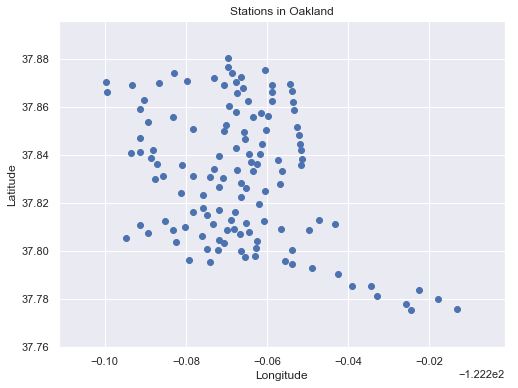

In [83]:
#show spatial distribution of stations in Oakland
plt.scatter(data = station_OA, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in Oakland");

In [84]:
#only keep rows, where station longitude is bigger than -122
#Get the stations of San Jose
station_SJ = station_1[station_1.start_station_longitude > -122]

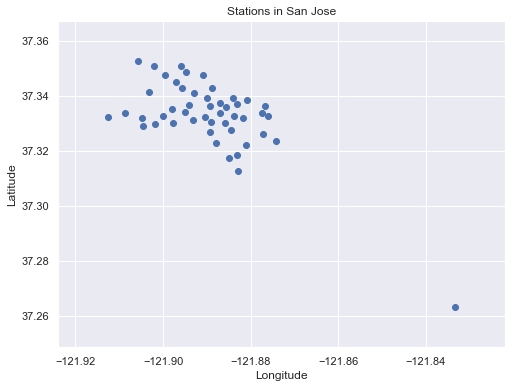

In [85]:
#show spatial distribution of stations in San Jose
plt.scatter(data = station_SJ, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Jose");

Now I want to adjust the size of the points in the scatter plots in order to indicate the annula number of rides, what started at these stations.

In [86]:
station_SF.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,15,38461,-122.394203,37.795392
1,67,37617,-122.395526,37.776639
2,30,35092,-122.395282,37.776598
3,58,34918,-122.417385,37.776619
4,81,33716,-122.393170,37.775880


Next, I generalize the number of rides into 4 different categories (100, 200, 300, 400), in order to improve the readability of the below plots: 

In [87]:
#create a series from the column ride_counts
ride_counts_series = station_SF['ride_counts']

#define function
def f_cat(x):
    if x < 10000:
        return 100
    elif x <= 20000:
        return 200
    elif x <= 30000:
        return 300
    else:
        return 400

#create a new column in station_SF 
station_SF['count_cat'] = ride_counts_series.apply(f_cat)





c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [88]:
station_SF.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude,count_cat
0,15,38461,-122.394203,37.795392,400
1,67,37617,-122.395526,37.776639,400
2,30,35092,-122.395282,37.776598,400
3,58,34918,-122.417385,37.776619,400
4,81,33716,-122.393170,37.775880,400


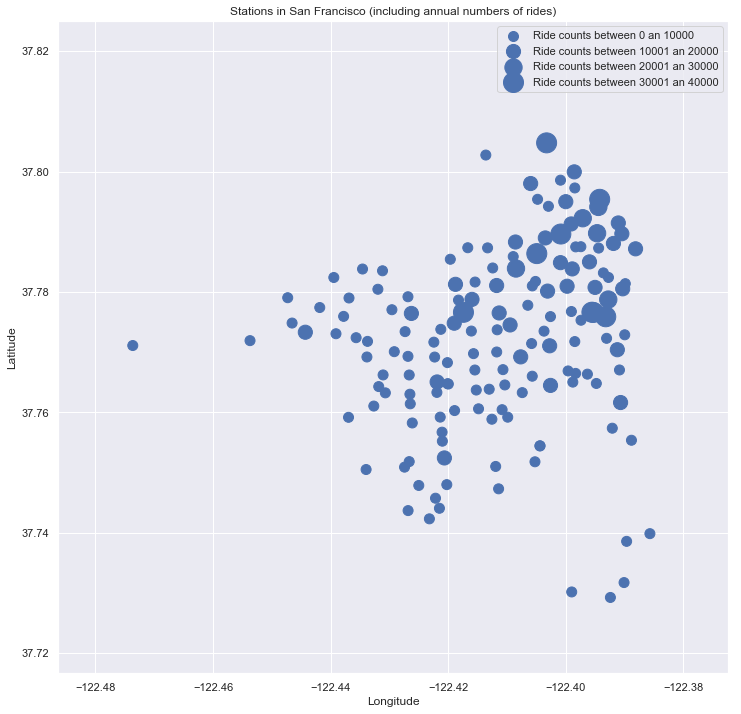

In [89]:
#show spatial distribution of stations in San Francisco (including annual numbers of rides)
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.scatter(data = station_SF, x = 'start_station_longitude', y = 'start_station_latitude', s = 'count_cat');


# dummy series for adding legend
sizes = [100, 200, 300, 400]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
L = plt.legend(legend_obj, sizes);
L.get_texts()[0].set_text('Ride counts between 0 an 10000')
L.get_texts()[1].set_text('Ride counts between 10001 an 20000')
L.get_texts()[2].set_text('Ride counts between 20001 an 30000')
L.get_texts()[3].set_text('Ride counts between 30001 an 40000')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Francisco (including annual numbers of rides)");


In [90]:
#create a series from the column ride_counts
ride_counts_series = station_OA['ride_counts']

#define function
def f_cat(x):
    if x < 10000:
        return 100
    elif x <= 20000:
        return 200
    elif x <= 30000:
        return 300
    else:
        return 400

#create a new column in station_SF 
station_OA['count_cat'] = ride_counts_series.apply(f_cat)

c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


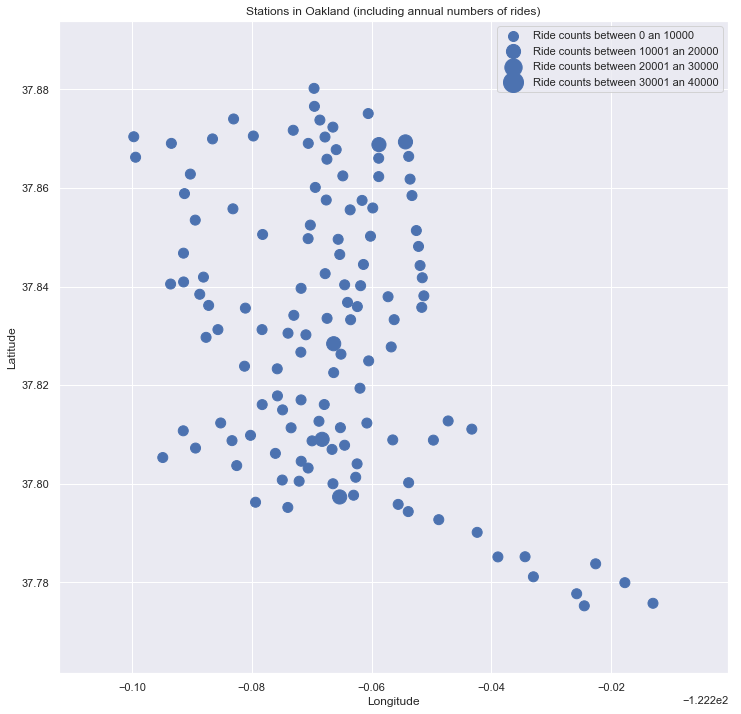

In [91]:
#show spatial distribution of stations in Oakland (including annual numbers of rides)
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.scatter(data = station_OA, x = 'start_station_longitude', y = 'start_station_latitude', s = 'count_cat');

# dummy series for adding legend
sizes = [100, 200, 300, 400]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
L = plt.legend(legend_obj, sizes);
L.get_texts()[0].set_text('Ride counts between 0 an 10000')
L.get_texts()[1].set_text('Ride counts between 10001 an 20000')
L.get_texts()[2].set_text('Ride counts between 20001 an 30000')
L.get_texts()[3].set_text('Ride counts between 30001 an 40000')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in Oakland (including annual numbers of rides)");

In [92]:
#create a series from the column ride_counts
ride_counts_series = station_SJ['ride_counts']

#define function
def f_cat(x):
    if x < 10000:
        return 100
    elif x <= 20000:
        return 200
    elif x <= 30000:
        return 300
    else:
        return 400

#create a new column in station_SF 
station_SJ['count_cat'] = ride_counts_series.apply(f_cat)

c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


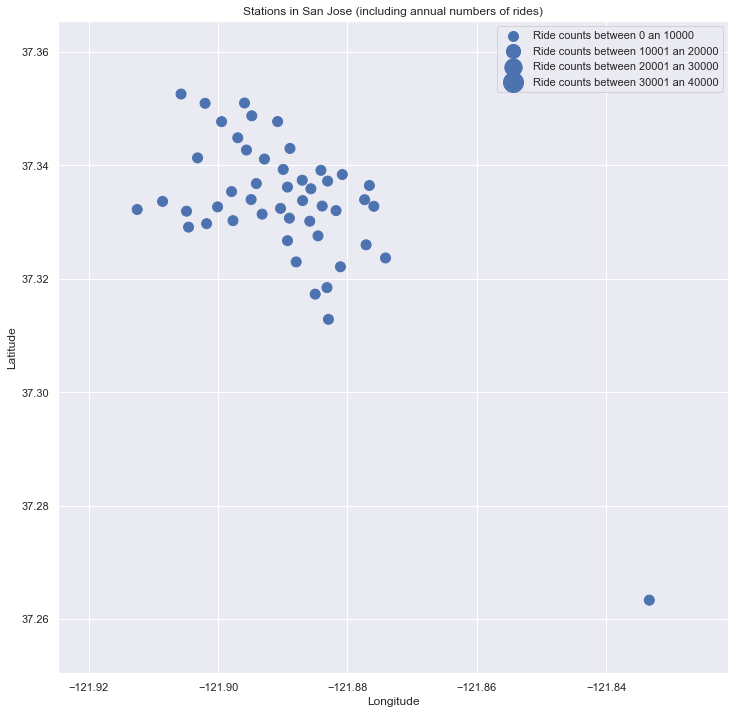

In [93]:
#show spatial distribution of stations in San Jose (including annual numbers of rides)
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.scatter(data = station_SJ, x = 'start_station_longitude', y = 'start_station_latitude', s = 'count_cat');

# dummy series for adding legend
sizes = [100, 200, 300, 400]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
L = plt.legend(legend_obj, sizes);
L.get_texts()[0].set_text('Ride counts between 0 an 10000')
L.get_texts()[1].set_text('Ride counts between 10001 an 20000')
L.get_texts()[2].set_text('Ride counts between 20001 an 30000')
L.get_texts()[3].set_text('Ride counts between 30001 an 40000')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Jose (including annual numbers of rides)");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part I observed that the dataset actually consists of three different cities in the San Francisco Bay Area. I also found out that the stations in San Francisco have the highest number of ride counts (they mainly concentrate in the Financial District), followed by the cities of Oakland and San Jose. 


### References
- [How to plot categorical data](http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot)